# Linear Regression 을 사용하여 E-Commerce 고객별 연간 지출액을 예측

- 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다

In [3]:
#데이터 처리 모듈
import pandas as pd
import numpy as np

#시각화 담당하는 모듈
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('ecommerce.csv')

In [6]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [8]:
#맨위 5줄만 출력됨
data.head()#()안에 숫자넣으면 숫자에 따라 출력됨 

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [13]:
# 기본 default 값 5 출려됨
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [14]:
data.info() # object는 text 정보이다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
#describe() 함수는 데이터의 컬럼별 요약 통계량을 나타냅니다. 또한 mean(), max(), median()등 개별 함수를 사용하여 통계량을 계산할 수도 있습니다.
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


- pandas의 DataFrame에 적용되는 통계 함수 정리
- 함수	설명
- count	전체 성분의 (NaN이 아닌) 값의 갯수를 계산
- min, max	전체 성분의 최솟, 최댓값을 계산
- argmin, argmax	전체 성분의 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
- idxmin, idxmax	전체 인덱스 중 최솟값, 최댓값을 반환
- quantile	전체 성분의 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
- sum	전체 성분의 합을 계산
- mean	전체 성분의 평균을 계산
- median	전체 성분의 중간값을 반환
- mad	전체 성분의 평균값으로부터의 절대 편차(absolute deviation)의 평균을 계산
- std, var	전체 성분의 표준편차, 분산을 계산
- cumsum	맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0에서부터 계속 더해짐)
- cumprod	맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1에서부터 계속 곱해짐)

In [20]:
data = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']] #indexing 가능 ,특정 칼럼 검색 가능

In [21]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [23]:
#train_test_split 함수는 전체 데이터셋 배열을 받아서 랜덤하게 훈련/테스트 데이터 셋으로 분리해주는 함수
from sklearn.model_selection import train_test_split

In [25]:
import pandas as pd

In [28]:
model_selection.train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [31]:
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [32]:
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [33]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [49]:
y = data['Yearly Amount Spent']

In [50]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [64]:
X_train, X_text, y_train, y_text = train_test_split(X,y, test_size=0.2,random_state=100)

In [65]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
205,34.967610,13.919494,37.952013,5.066697
404,32.278443,12.527472,36.688367,3.531402
337,31.827979,12.461147,37.428997,2.974737
440,33.200616,11.965980,36.831536,3.549036
55,33.925297,11.588655,35.252242,3.392050
...,...,...,...,...
343,32.302748,12.815393,37.957810,4.615426
359,32.054262,13.149670,37.650400,4.195614
323,32.762456,10.952353,37.646292,4.019470
280,32.271848,13.485009,37.550880,3.086337


In [68]:
#statsmodels(“스탯츠모델즈”라고 읽는다) 패키지는 추정 및 검정, 회귀분석, 시계열분석 등의 기능을 제공하는 파이썬 패키지
import statsmodels.api as sm

In [73]:
model = sm.OLS(y_train, X_train)

In [75]:
model = model.fit() # training 됨

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.798e+04
Date:                 Mon, 12 Apr 2021   Prob (F-statistic):                        0.00
Time:                         16:07:01   Log-Likelihood:                         -1820.0
No. Observations:                  400   AIC:                                      3648.
Df Residuals:                      396   BIC:                                      3664.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.9059      0.869     13.696      0.000      10.197      13.615
Time on App             34.3257      1.121     30.610      0.000      32.121      36.530
Time on Website        -14.1405      0.812    -17.405      0.000     -15.738     -12.543
Length of Membership    61.0149      1.144     53.318      0.000      58.765      63.265
==============================================================================
Omnibus:                        0.490   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.606
Skew:                          -0.022   Prob(JB):                        0.739
Kurtosis:                       2.814   Cond. No.                         55.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#R-squared

## -클수록 좋은 모델 (1에 가까울 수록 좋음)
## - Adj.가 더욱 적절한 평가 기준

#Coef

## -변수의 영향력 (강도와 방향)
## - 직선의 기울기 
## - coef 의 크기가 클수록 더 중요한 변수임


#P-value

## -신뢰할 수 있는 결과인지 측정
## - 0.05이면 양호

In [79]:
pred = model.predict(X_text)

In [80]:
pred

69     418.211323
29     567.097473
471    534.706617
344    425.690888
54     474.931682
          ...    
460    570.877250
152    564.267305
154    557.093996
56     489.285778
392    550.720695
Length: 100, dtype: float64

In [78]:
y_text

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
460    618.845970
152    555.892595
154    595.803819
56     520.898794
392    549.131573
Name: Yearly Amount Spent, Length: 100, dtype: float64

<AxesSubplot:xlabel='Yearly Amount Spent'>

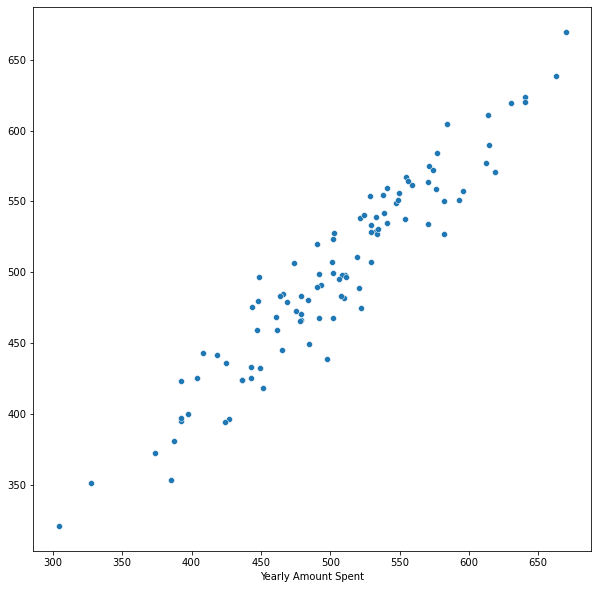

In [83]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_text, y=pred)
#실제값과 예측값을 시각화 하기
#실행결과 - 완전히 일치하지 않지만 어느정도 예측함 

# 고객별 연간 지출액 예측 - 08. 모델을 활용하여 예측하고 평가하기

In [85]:
from sklearn.metrics import mean_squared_error

In [87]:
mean_squared_error(y_text, pred)

482.2890139088964

In [89]:
#RMSE / 20정도 error를 보임
np.sqrt(mean_squared_error(y_text, pred))

21.961079525125726